In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


* print top 5 rows of world data-frame

* remove continents which have only one country in data-frame


In [14]:
grouped = world.groupby('continent').count()
grouped[grouped.iloc[:,0] ==1].index.values

array(['Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [39]:
# continents with only one country
# remove these continents
grouped = world.groupby('continent').count()
world_mod = world[ ~world.continent.isin(grouped[grouped.iloc[:,0] ==1].index.values)]






* create dataframe with top 3 most populated countries from each continent
* store the result in data-frame with name 'world_filtered'

In [59]:
# https://gis.stackexchange.com/questions/162659/joining-concat-list-of-similar-dataframes-in-geopandas
# https://geopandas.org/mergingdata.html
# https://codereview.stackexchange.com/questions/151530/finding-the-states-with-the-three-most-populous-counties
world_filtered = world_mod.groupby('continent')[world_mod.columns].apply(
    lambda x: x.nlargest(3, 'pop_est'))


* print 'world_filtered' data-frame

In [60]:
world_filtered.head()

pop_est continent      name iso_a3  gdp_md_est  \
continent                                                          
Africa    56    190632261    Africa   Nigeria    NGA   1089000.0   
          165   105350020    Africa  Ethiopia    ETH    174700.0   
          163    97041072    Africa     Egypt    EGY   1105000.0   
Asia      139  1379302771      Asia     China    CHN  21140000.0   
          98   1281935911      Asia     India    IND   8721000.0   

                                                        geometry  
continent                                                         
Africa    56   POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....  
          165  POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...  
          163  POLYGON ((36.86623 22.00000, 32.90000 22.00000...  
Asia      139  MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...  
          98   POLYGON ((97.32711 28.26158, 97.40256 27.88254...

* create choropleth map of world
* the colors of countries from 'world_filtered' are based on population
* other countries are white with black edgecolor

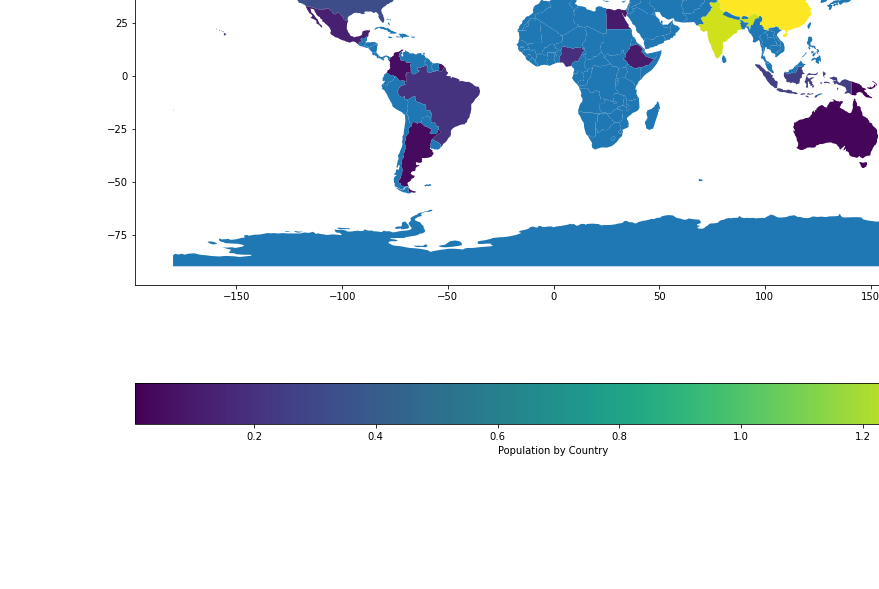

In [72]:
# create figure and axes

fig, ax = plt.subplots(figsize=(15,12))


# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# add the rest of the countries
the_rest = world[ ~world.name.isin(world_filtered.name)]

the_rest.plot(ax=ax)


plt.show()

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
* to get geometry of these cities use gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
* if you do not have geopy library instaled, install it with the following command in the jupyter notebook cell
* !pip install geopy

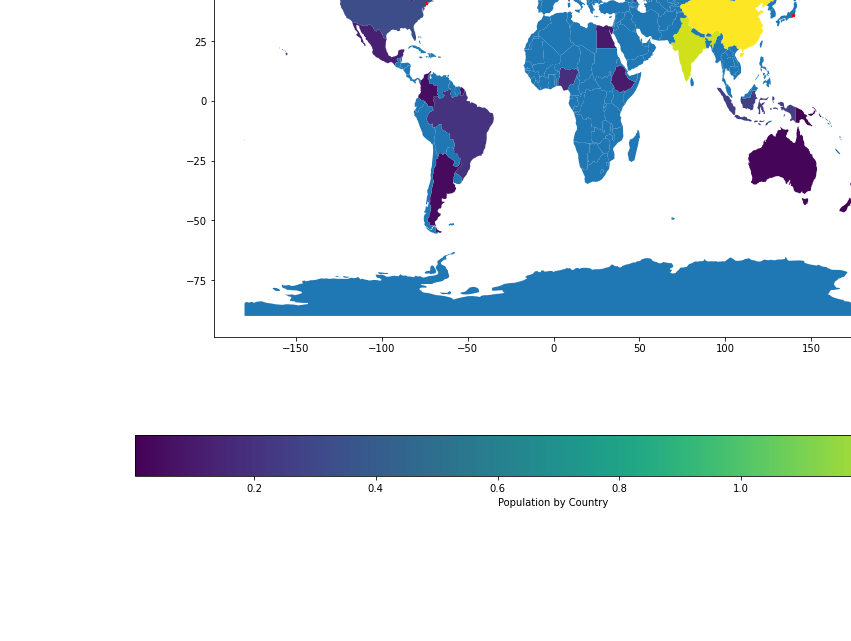

In [73]:
# https://wenyandeng.wordpress.com/2017/07/20/maps-of-sri-lankan-army-deaths-with-geopandas/
# get geometry
cities = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])

# create figure and axes
fig, ax = plt.subplots(figsize=(15,12))



# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})



# add the rest of the countries
the_rest = world[ ~world.name.isin(world_filtered.name)]
the_rest.plot(ax=ax)


# add cities
cities.plot(ax=ax ,marker='*', color='red', markersize=10)
plt.show()

